# CytoSnake Benchmark Comparison Analysis

In [56]:
import json
import pathlib

import pandas as pd
import plotly.graph_objects as go

In [57]:
# Helper functions
def generate_colors(num_colors: int) -> list[str]:
    """Generates an array of colors based on the length of keys

    Parameters
    ----------
    num_colors : int
        number of colors to select

    Returns
    -------
    list[str]
        list of colors in RGB format
    """
    colors = []
    for i in range(num_colors):
        hue = (i * 360 / num_colors) % 360
        color = f"hsl({hue}, 50%, 50%)"
        colors.append(color)
    return colors


def plot_file_sizes(data: pd.DataFrame, title: str) -> None:
    """Creates a bar graph based on file sizes

    Parameters
    ----------
    data : pd.DataFrame

    title : str
        _description_
    """
    plates = list(data.keys())
    values = list(data.values())

    # Define colors for each bar
    # colors = ["red", "green", "blue", "orange", "purple"]
    colors = generate_colors(len(plates))

    # Create a bar plot using Plotly
    fig = go.Figure(data=[go.Bar(x=plates, y=values, marker_color=colors)])

    # Add values on top of each bar
    for i, v in enumerate(values):
        fig.add_annotation(x=plates[i], y=v + 10, text=str(v), showarrow=False)

    # Adding labels and title
    fig.update_layout(
        title_text=title, xaxis_title="Plate Names", yaxis_title="File Size (MB)"
    )

    # Show the plot``
    return fig.show()

In [90]:
# paths
all_benchmarks_path = pathlib.Path("../all-benchmarks/")
control_path = (all_benchmarks_path / "control").resolve(strict=True)

# control benchmark profiles
nf1_bench_profile_path = (
    control_path / "nf1_benchmarks/nf1_complete_benchmark.csv"
).resolve(strict=True)
cfret_bench_profile_path = (
    control_path / "CFReT_benchmarks/CFReT_complete_benchmark.csv"
).resolve(strict=True)

# CytoSnake workflow benchmark profiles
cfret_cs_benchmark_profiles = (
    all_benchmarks_path
    / "CFReT_cp-process-singlecells_benchmarks/CFReT_cp_processing_singlecells_benchmark_profile.csv"
).resolve(strict=True)
nf1_cs_benchmarks_profiles = (
    all_benchmarks_path
    / "nf1_sc_cp-process-singlecells_benchmarks/nf1_cp_processing_singlecells_benchmark_profile.csv"
).resolve(strict=True)

# file size profiles
nf1_file_size_path = (control_path / "nf1_benchmarks/file_size.json").resolve(
    strict=True
)
cfret_file_size_path = (control_path / "CFReT_benchmarks/file_size.json").resolve(
    strict=True
)

# outputs folders
fig_folder_path = pathlib.Path("./figures").resolve()
fig_folder_path.mkdir(exist_ok=True)

In [92]:
# loading in file sizes
with open(nf1_file_size_path, mode="r") as stream:
    nf1_file_sizes = json.load(stream)

with open(cfret_file_size_path, mode="r") as stream:
    cfret_file_sizes = json.load(stream)

# loading benchmark profiles
control_nf1 = pd.read_csv(nf1_bench_profile_path)
control_cfret = pd.read_csv(cfret_bench_profile_path)

cytosnake_nf1 = pd.read_csv(nf1_cs_benchmarks_profiles).drop("Unnamed: 0", axis=1)
cytosnake_cfret = pd.read_csv(cfret_cs_benchmark_profiles).drop("Unnamed: 0", axis=1)

## Plotting file size 

In [93]:
plot_file_sizes(nf1_file_sizes, title="NF1 File Sizes (MB)")

In [109]:
plot_file_sizes(cfret_file_sizes, title="CFReT File Sizes (MB)")

## Plotting run time performance

In [103]:
# summin all
control_time_nf1 = round(control_nf1["time_duration"].sum() / 60, 3)
test_time_nf1 = round(cytosnake_nf1["time_duration"].max() / 60, 3)

47.748000000000005

In [104]:
# this is done with sqlite files
control_time_cfret = control_cfret["time_duration"].sum() / 60
test_time_cfret = cytosnake_cfret["time_duration"].max() / 60

In [ ]:
legend_labels = ["cytosnake", "data-repo"]
x_labels = ["cfret", "nf1"]

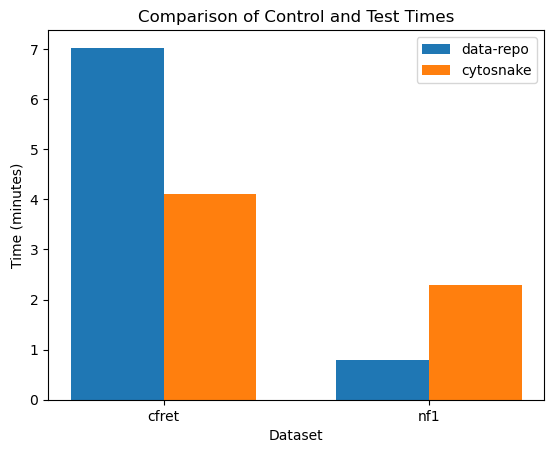

In [106]:
import matplotlib.pyplot as plt
import numpy as np

# Data
control_time_nf1 = round(control_nf1["time_duration"].sum() / 60, 3)
test_time_nf1 = round(cytosnake_nf1["time_duration"].max() / 60, 3)

control_time_cfret = round(control_cfret["time_duration"].sum() / 60, 3)
test_time_cfret = round(cytosnake_cfret["time_duration"].max() / 60, 3)

legend_labels = ["cytosnake", "data-repo"]
x_labels = ["cfret", "nf1"]

control_times = [control_time_cfret, control_time_nf1]
test_times = [test_time_cfret, test_time_nf1]

bar_width = 0.35
index = np.arange(len(x_labels))

# Create a bar plot
fig, ax = plt.subplots()
bar1 = ax.bar(index, control_times, bar_width, label=legend_labels[1])
bar2 = ax.bar(index + bar_width, test_times, bar_width, label=legend_labels[0])

# Adding labels and title
ax.set_xlabel("Dataset")
ax.set_ylabel("Time (minutes)")
ax.set_title("Comparison of Control and Test Times")
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(x_labels)
ax.legend()

# Show the plot
plt.show()

In [107]:
## Peak memory usage

0.796

In [111]:
control_nf1

,pid,process_name,input_data_name,start_time,end_time,time_duration,total_allocations,peak_memory,file_size
0,296901,normalize,Plate_4,2023-11-09 12:15:44.326,2023-11-09 12:15:47.675,3.349,2697600,622.491,222.945
1,296901,normalize,Plate_3_prime,2023-11-09 12:15:28.642,2023-11-09 12:15:33.599,4.957,2711400,1150.830,444.938
2,296901,normalize,Plate_3,2023-11-09 12:15:09.348,2023-11-09 12:15:15.394,6.046,2711861,1538.915,551.629
3,296901,aggregate,Plate_3_prime,2023-11-09 12:15:41.071,2023-11-09 12:15:42.108,1.037,668551,250.406,444.938
4,296901,feature_select,Plate_1,2023-11-09 12:14:56.535,2023-11-09 12:14:58.624,2.089,1638491,263.136,4.727
5,296901,annotate,Plate_3_prime,2023-11-09 12:15:25.512,2023-11-09 12:15:25.897,0.385,7667,517.028,444.938
6,296901,aggregate,Plate_4,2023-11-09 12:15:53.123,2023-11-09 12:15:54.005,0.882,688175,133.504,222.945
7,296901,aggregate,Plate_1,2023-11-09 12:14:58.787,2023-11-09 12:14:59.278,0.491,497903,4.767,4.727
8,296901,normalize,Plate_2,2023-11-09 12:15:00.073,2023-11-09 12:15:01.863,1.790,2015427,102.281,30.598
9,296901,annotate,Plate_1,2023-11-09 12:14:54.557,2023-11-09 12:14:54.627,0.070,4206,6.753,4.727


In [112]:
cytosnake_nf1

,pid,process_name,input_data_name,start_time,end_time,time_duration,total_allocations,peak_memory,file_size
0,2055507,feature_select,Plate_3_prime,2023-12-28 15:44:13.100,2023-12-28 15:45:03.253,50.153,29706986,735.230,444.938
1,2056506,feature_select,Plate_3,2023-12-28 15:45:49.986,2023-12-28 15:46:51.841,61.855,38371485,930.416,551.629
2,2039328,feature_select,Plate_2,2023-12-28 15:39:28.029,2023-12-28 15:39:34.022,5.993,2941689,192.806,30.598
3,2028154,analysis_annotate,Plate_1,2023-12-28 15:39:05.208,2023-12-28 15:39:07.372,2.164,1877874,43.003,4.727
4,2054817,analysis_annotate,Plate_3,2023-12-28 15:43:31.476,2023-12-28 15:45:34.531,123.055,104768964,1526.626,551.629
5,2033315,analysis_annotate,Plate_2,2023-12-28 15:39:13.335,2023-12-28 15:39:23.156,9.821,7699972,104.341,30.598
6,2051694,feature_select,Plate_4,2023-12-28 15:41:18.437,2023-12-28 15:41:53.149,34.712,17288206,484.301,222.945
7,2047513,analysis_normalize,Plate_4,2023-12-28 15:40:12.325,2023-12-28 15:41:16.722,64.397,43003649,1031.830,222.945
8,2047510,analysis_annotate,Plate_4,2023-12-28 15:40:12.214,2023-12-28 15:41:09.901,57.687,42705062,899.557,222.945
9,2034298,analysis_normalize,Plate_2,2023-12-28 15:39:15.598,2023-12-28 15:39:26.705,11.107,7816033,177.575,30.598
